In [115]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

## Problem 1: Linear Regression

you are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [116]:
df = pd.read_csv("cubic_zirconia.csv")  

In [117]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [118]:
df.shape

(26967, 11)

In [119]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [120]:
df = df.drop('Unnamed: 0', axis=1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [122]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [123]:
df.isnull().sum()/df.shape[0]

carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      0.025846
table      0.000000
x          0.000000
y          0.000000
z          0.000000
price      0.000000
dtype: float64

In [124]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [125]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




Univariate / Bivariate analysis

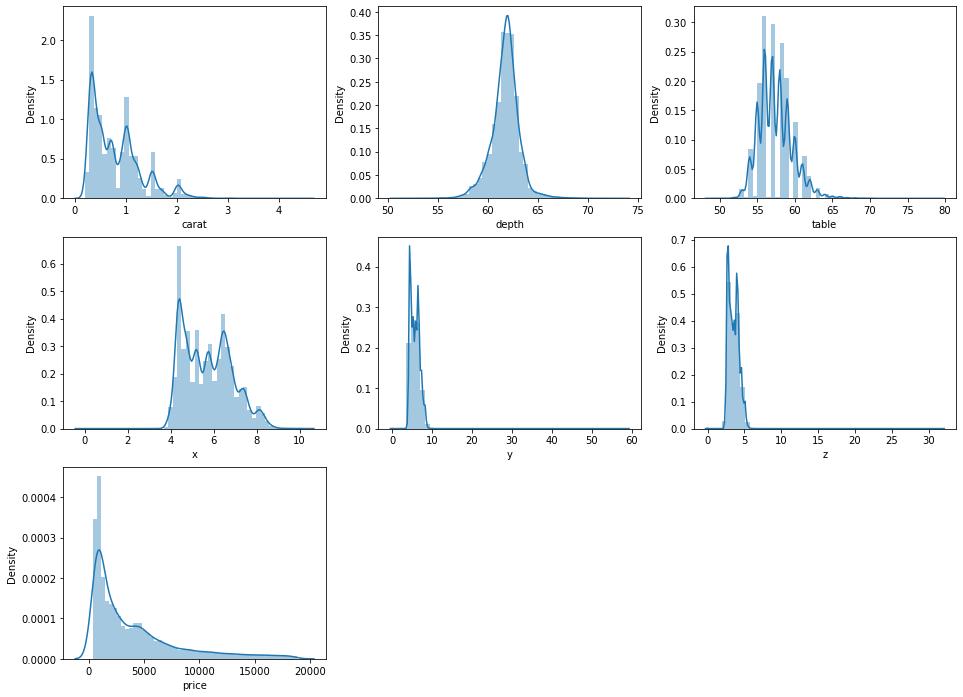

In [126]:
plt.figure(figsize=(16,12))
j=1
for i in ['carat','depth','table','x','y','z','price']:
    plt.subplot(3,3,j)
    sns.distplot(df[i])
    j=j+1

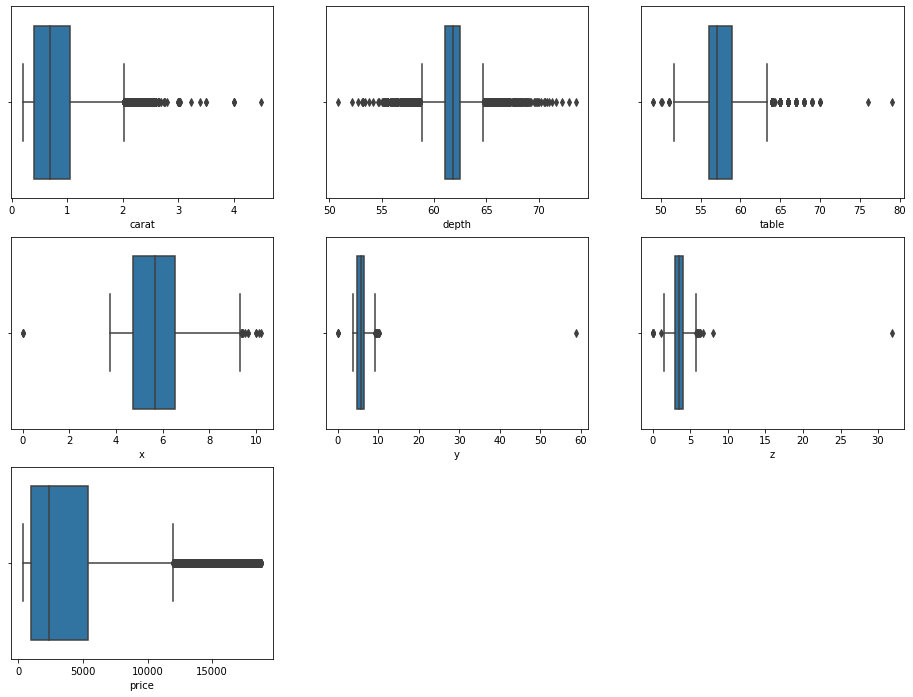

In [127]:
plt.figure(figsize=(16,12))
j=1
for i in ['carat','depth','table','x','y','z','price']:
    plt.subplot(3,3,j)
    sns.boxplot(df[i])
    j=j+1

In [128]:
for i in ['carat','depth','table','x','y','z','price']:
    print(i,"Skewed: ",round(df[i].skew(),4))

carat Skewed:  1.1165
depth Skewed:  -0.0286
table Skewed:  0.7658
x Skewed:  0.388
y Skewed:  3.8502
z Skewed:  2.5683
price Skewed:  1.6185


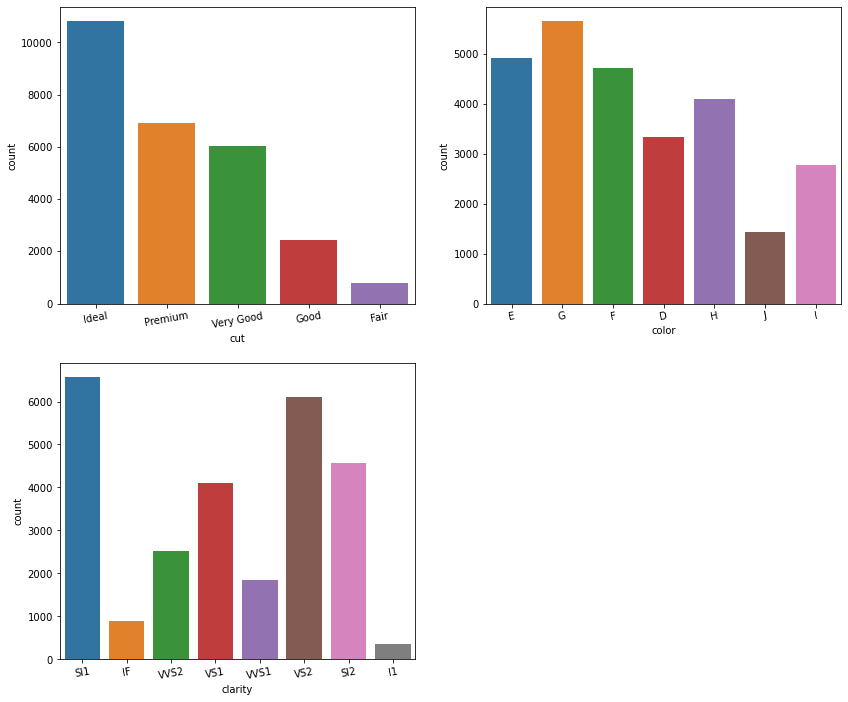

In [129]:
plt.figure(figsize=(14,12))

j=1
for i in ['cut','color','clarity']:
    plt.subplot(2,2,j)
    sns.countplot(df[i])
    plt.xticks(rotation=10)
    j=j+1

Bivariate analysis

<AxesSubplot:xlabel='clarity', ylabel='price'>

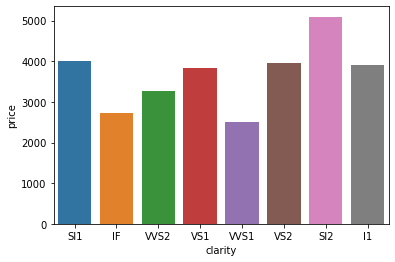

In [130]:
sns.barplot(x=df['clarity'],y=df['price'], ci=0)

<AxesSubplot:xlabel='cut', ylabel='price'>

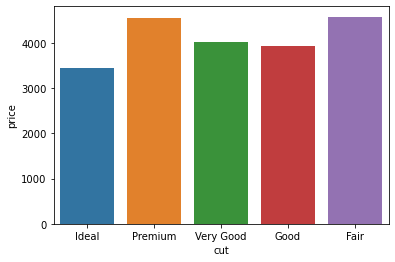

In [131]:
sns.barplot(x=df['cut'],y=df['price'] ,ci=0)

<AxesSubplot:xlabel='color', ylabel='price'>

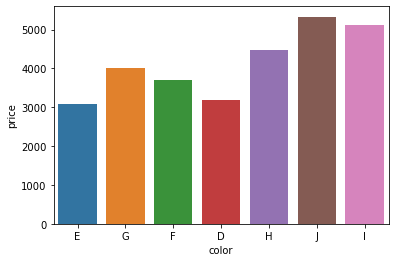

In [132]:
sns.barplot(x=df['color'],y=df['price'] ,ci=0)

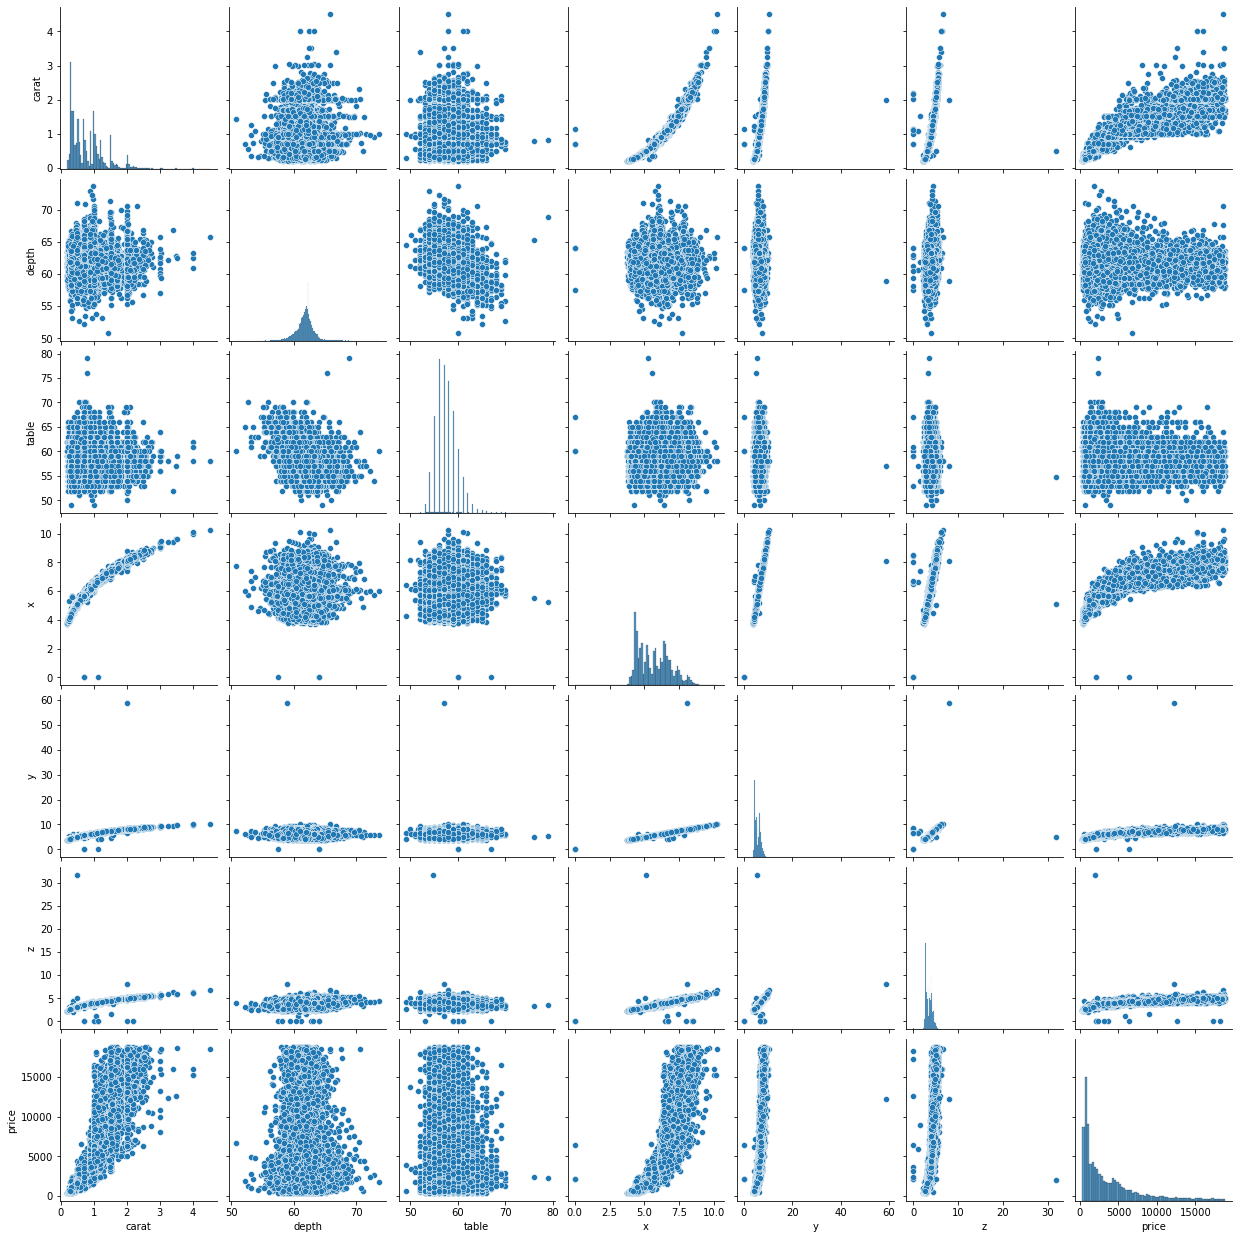

In [133]:
sns.pairplot(df)

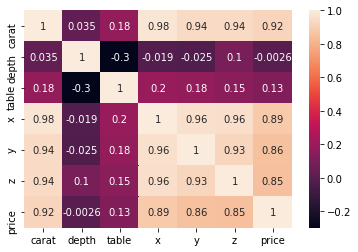

In [134]:
sns.heatmap(df.corr(), annot=True);

### Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [135]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [136]:
df.isnull().sum()/len(df)

carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      0.025846
table      0.000000
x          0.000000
y          0.000000
z          0.000000
price      0.000000
dtype: float64

In [137]:
median = df['depth'].median()
df['depth'] = df['depth'].fillna(median)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [138]:
df.all()

carat       True
cut         True
color       True
clarity     True
depth       True
table       True
x          False
y          False
z          False
price       True
dtype: bool

In [139]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [140]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)


In [141]:
df.all()

carat      True
cut        True
color      True
clarity    True
depth      True
table      True
x          True
y          True
z          True
price      True
dtype: bool

In [142]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [143]:
for column in ['carat','depth','table','x','y','z','price']:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

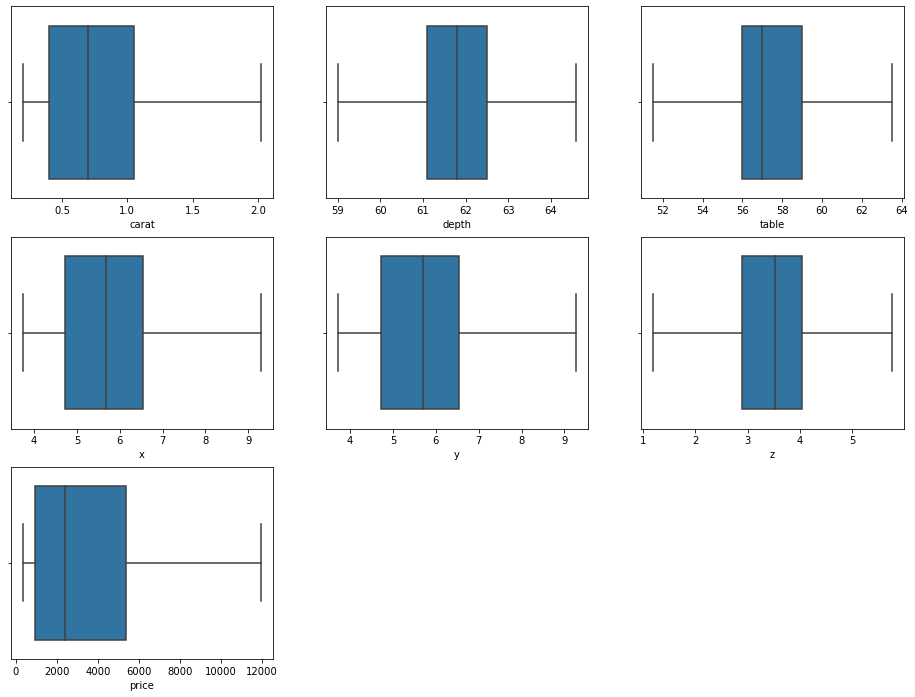

In [144]:
plt.figure(figsize=(16,12))
j=1
for i in ['carat','depth','table','x','y','z','price']:
    plt.subplot(3,3,j)
    sns.boxplot(df[i])
    j=j+1

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_d = df.select_dtypes(exclude=['object'])
num_d
df[num_d.columns] = sc.fit_transform(num_d)

In [146]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067306,Ideal,E,SI1,0.286726,0.261941,-1.296438,-1.289580,-1.261448,-0.933219
1,-1.002414,Premium,G,IF,-0.780109,0.261941,-1.163237,-1.137532,-1.203982,-0.793428
2,0.230546,Very Good,E,VVS2,0.368790,1.189304,0.275339,0.347170,0.347606,0.735631
3,-0.807736,Ideal,F,VS1,-0.123596,-0.665422,-0.808033,-0.833436,-0.830451,-0.765181
4,-1.045675,Ideal,F,VVS1,-1.108366,0.725622,-1.225398,-1.164364,-1.275814,-0.852515


### Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [147]:
data = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [148]:
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067306,0.286726,0.261941,-1.296438,-1.289580,-1.261448,-0.933219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.002414,-0.780109,0.261941,-1.163237,-1.137532,-1.203982,-0.793428,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.230546,0.368790,1.189304,0.275339,0.347170,0.347606,0.735631,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.807736,-0.123596,-0.665422,-0.808033,-0.833436,-0.830451,-0.765181,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.045675,-1.108366,0.725622,-1.225398,-1.164364,-1.275814,-0.852515,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [149]:
data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [150]:
data.shape

(26958, 24)

In [151]:
X = data.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data[['price']]

In [152]:
X.shape

(26958, 23)

In [153]:
y.shape

(26958, 1)

Linear Regression Model

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [155]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [156]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2358093063484565
The coefficient for depth is 0.005681781619185346
The coefficient for table is -0.0149297410250086
The coefficient for x is -0.35355573073496177
The coefficient for y is 0.338428967376515
The coefficient for z is -0.15648799801269386
The coefficient for cut_Good is 0.10904474596752811
The coefficient for cut_Ideal is 0.1766242155294696
The coefficient for cut_Premium is 0.1722373351767154
The coefficient for cut_Very Good is 0.14592655610103092
The coefficient for color_E is -0.054565752180473735
The coefficient for color_F is -0.072690724250613
The coefficient for color_G is -0.1167998797001075
The coefficient for color_H is -0.24082413839492464
The coefficient for color_I is -0.37566722366410227
The coefficient for color_J is -0.5433905358981461
The coefficient for clarity_IF is 1.1593629758064512
The coefficient for clarity_SI1 is 0.7409791729531008
The coefficient for clarity_SI2 is 0.49817342838278567
The coefficient for clarity_VS1 

In [157]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.8323524295093438


In [158]:
# R square on training data
regression_model.score(X_train, y_train)

0.9419557931252712

In [159]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9381643998102491

In [160]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.23992842984922294

In [161]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.25103473833743095

In [162]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 


In [163]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35287649550623
depth ---> 4.574003842337532
table ---> 1.7722022611198982
x ---> 463.94494858728734
y ---> 463.08309600508517
z ---> 238.6002431605187
cut_Good ---> 3.6104961328079184
cut_Ideal ---> 14.347409690217939
cut_Premium ---> 8.623207030351887
cut_Very Good ---> 7.852218650260111
color_E ---> 2.3710537954581707


Using Statsmodel library

In [164]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.180440,1.271496,0.725622,-0.186426,-0.108973,-0.025924,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.279226
8882,-1.067306,0.943239,0.261941,-1.296438,-1.271692,-1.203982,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.920249
22763,-0.202071,1.763881,0.725622,-0.079865,-0.117917,0.074642,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.399418
6643,-0.937521,-1.272495,-0.665422,-0.958995,-0.994428,-1.074683,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.765758
18701,1.874493,1.025303,-0.201740,1.527433,1.581441,1.683696,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.488488


In [165]:
data_train.columns


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [166]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)


In [167]:
data_train.columns


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [168]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.832352
carat            1.235809
depth            0.005682
table           -0.014930
x               -0.353556
y                0.338429
z               -0.156488
cut_Good         0.109045
cut_Ideal        0.176624
cut_Premium      0.172237
cut_Very_Good    0.145927
color_E         -0.054566
color_F         -0.072691
color_G         -0.116800
color_H         -0.240824
color_I         -0.375667
color_J         -0.543391
clarity_IF       1.159363
clarity_SI1      0.740979
clarity_SI2      0.498173
clarity_VS1      0.971872
clarity_VS2      0.888305
clarity_VVS1     1.092461
clarity_VVS2     1.080042
dtype: float64

In [169]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:47:17   Log-Likelihood:                 159.94
No. Observations:               18870   AIC:                            -271.9
Df Residuals:                   18846   BIC:                            -83.60
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8324      0.019    -44.588

In [170]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [171]:
import math

math.sqrt(mse)

0.2510347383374311

In [172]:
regression_model.score(X_test, y_test)

0.9381643998102491

In [173]:
y_pred = regression_model.predict(X_test)

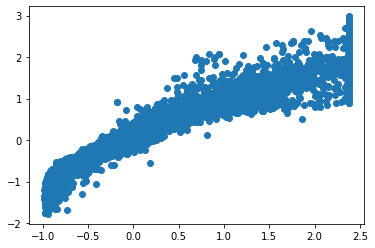

In [174]:
plt.scatter(y_test['price'], y_pred)

In [175]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat  + table  + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm2.params

Intercept       -0.832269
carat            1.236946
table           -0.015612
x               -0.365810
y                0.315607
z               -0.122330
cut_Good         0.110307
cut_Ideal        0.175305
cut_Premium      0.170878
cut_Very_Good    0.145550
color_E         -0.054635
color_F         -0.072740
color_G         -0.116725
color_H         -0.240702
color_I         -0.375359
color_J         -0.543203
clarity_IF       1.159684
clarity_SI1      0.741936
clarity_SI2      0.498868
clarity_VS1      0.972497
clarity_VS2      0.889069
clarity_VVS1     1.092825
clarity_VVS2     1.080657
dtype: float64

In [176]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:47:25   Log-Likelihood:                 158.78
No. Observations:               18870   AIC:                            -271.6
Df Residuals:                   18847   BIC:                            -91.12
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8323      0.019    -44.583

In [177]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.83) * Intercept + (1.24) * carat + (-0.02) * table + (-0.37) * x + (0.32) * y + (-0.12) * z + (0.11) * cut_Good + (0.18) * cut_Ideal + (0.17) * cut_Premium + (0.15) * cut_Very_Good + (-0.05) * color_E + (-0.07) * color_F + (-0.12) * color_G + (-0.24) * color_H + (-0.38) * color_I + (-0.54) * color_J + (1.16) * clarity_IF + (0.74) * clarity_SI1 + (0.5) * clarity_SI2 + (0.97) * clarity_VS1 + (0.89) * clarity_VS2 + (1.09) * clarity_VVS1 + (1.08) * clarity_VVS2 + 

### Inference: Basis on these predictions, what are the business insights and recommendations.

Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

## Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [67]:
df=pd.read_csv('Holiday_Package.csv')

In [68]:
df.shape

(872, 8)

In [69]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [70]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [71]:
df = df.drop('Unnamed: 0', axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [73]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [74]:
df.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [75]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




Univariate / Bivariate analysis

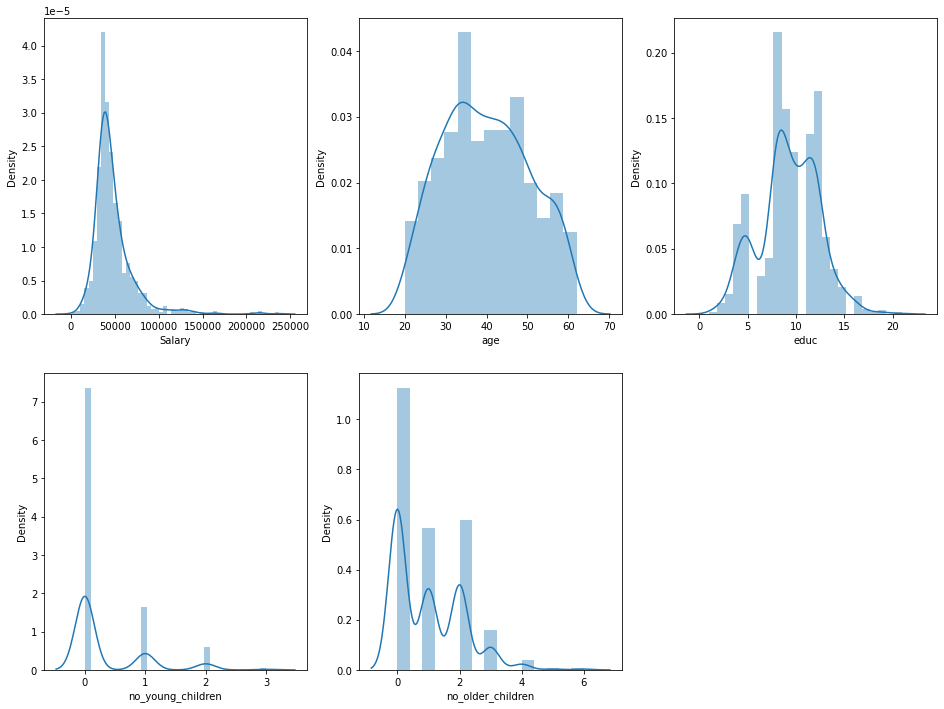

In [11]:
plt.figure(figsize=(16,12))
j=1
for i in ['Salary','age','educ','no_young_children','no_older_children']:
    plt.subplot(2,3,j)
    sns.distplot(df[i])
    j=j+1

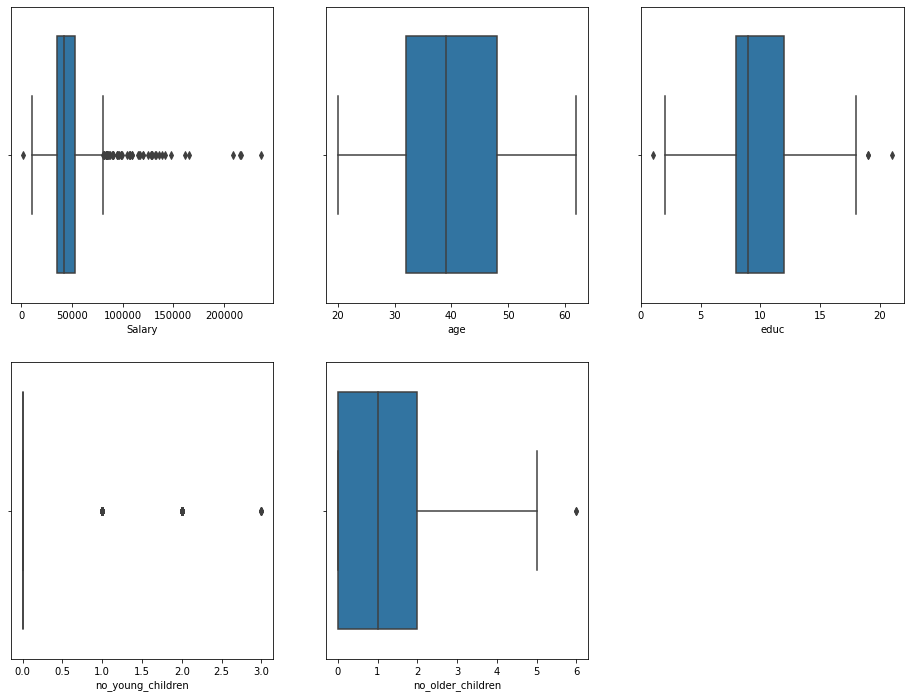

In [12]:
plt.figure(figsize=(16,12))
j=1
for i in ['Salary','age','educ','no_young_children','no_older_children']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i])
    j=j+1

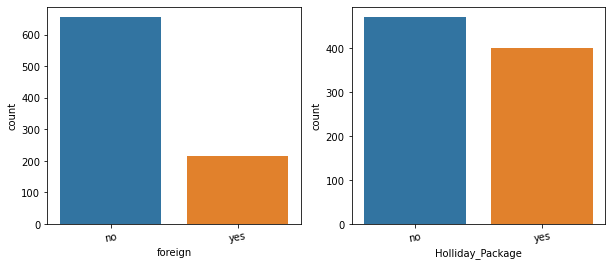

In [13]:
plt.figure(figsize=(10,4))

j=1
for i in ['foreign','Holliday_Package']:
    plt.subplot(1,2,j)
    sns.countplot(df[i])
    plt.xticks(rotation=10)
    j=j+1

<AxesSubplot:xlabel='Holliday_Package'>

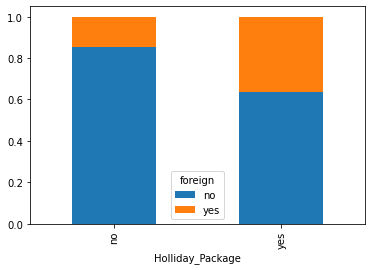

In [14]:
pd.crosstab(df['Holliday_Package'], df['foreign'], normalize='index').plot(kind='bar', stacked=True)


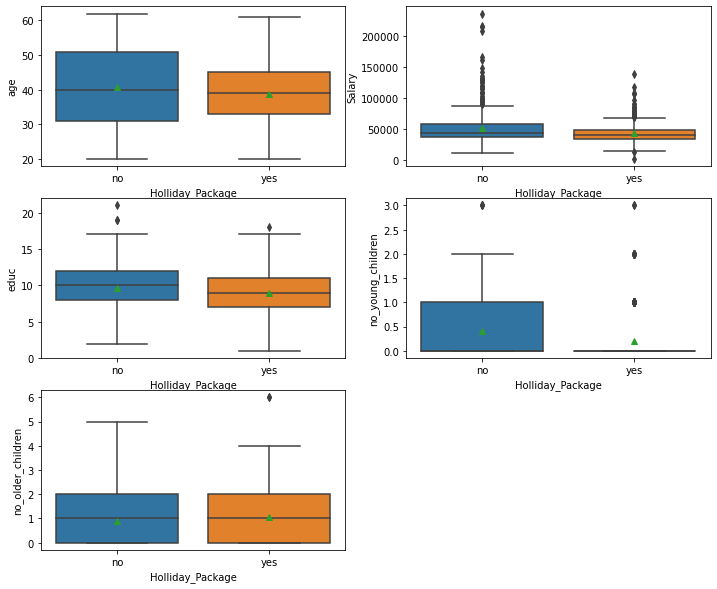

In [15]:
plt.figure(figsize=(12,10))
j=1
for i in ['age','Salary','educ','no_young_children','no_older_children']:
    plt.subplot(3,2,j)
    sns.boxplot(y=df[i], x=df['Holliday_Package'],showmeans=True)
    j=j+1

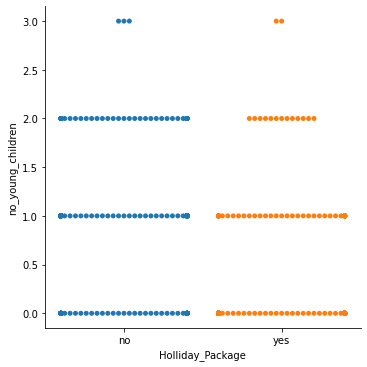

In [16]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df)


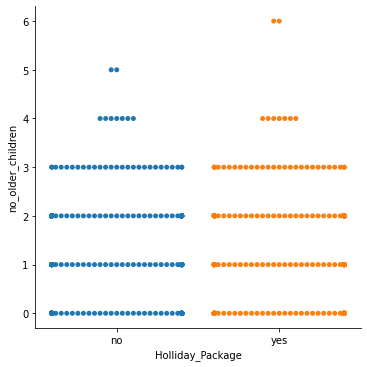

In [17]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df)


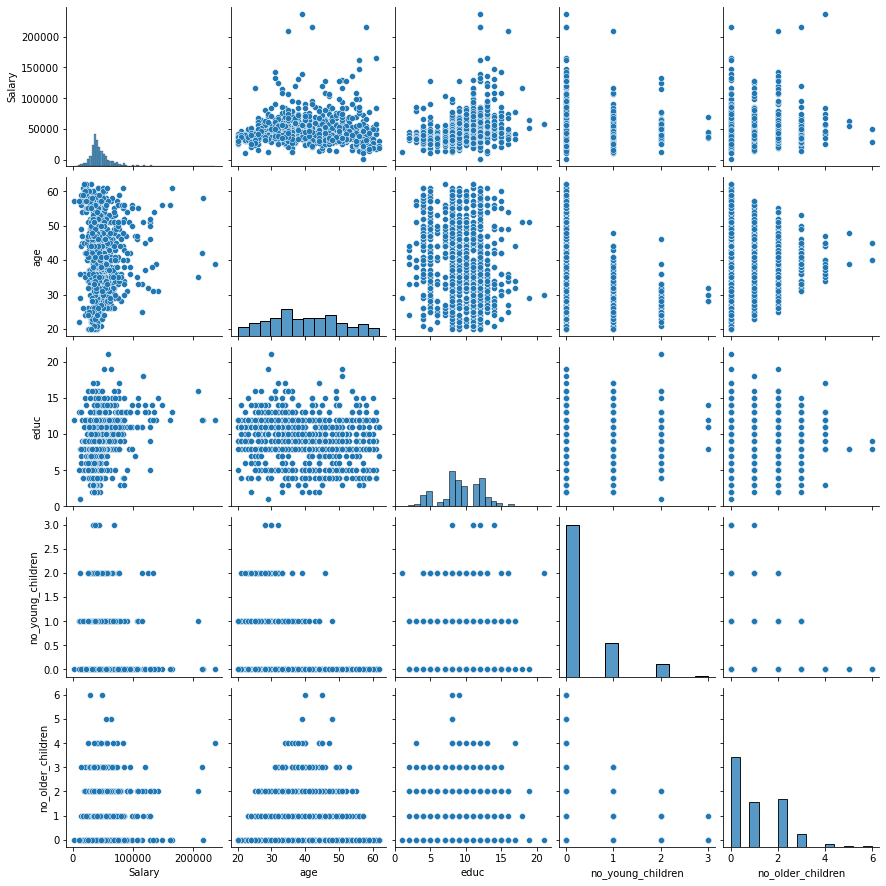

In [18]:
sns.pairplot(df)

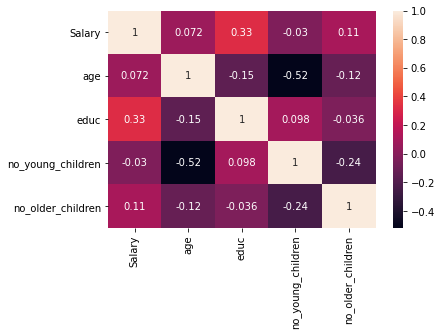

In [19]:
sns.heatmap(df.corr(), annot=True);

###  Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis)

In [76]:
df.all()

Holliday_Package      True
Salary                True
age                   True
educ                  True
no_young_children    False
no_older_children    False
foreign               True
dtype: bool

In [77]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [78]:
for column in ['Salary']:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

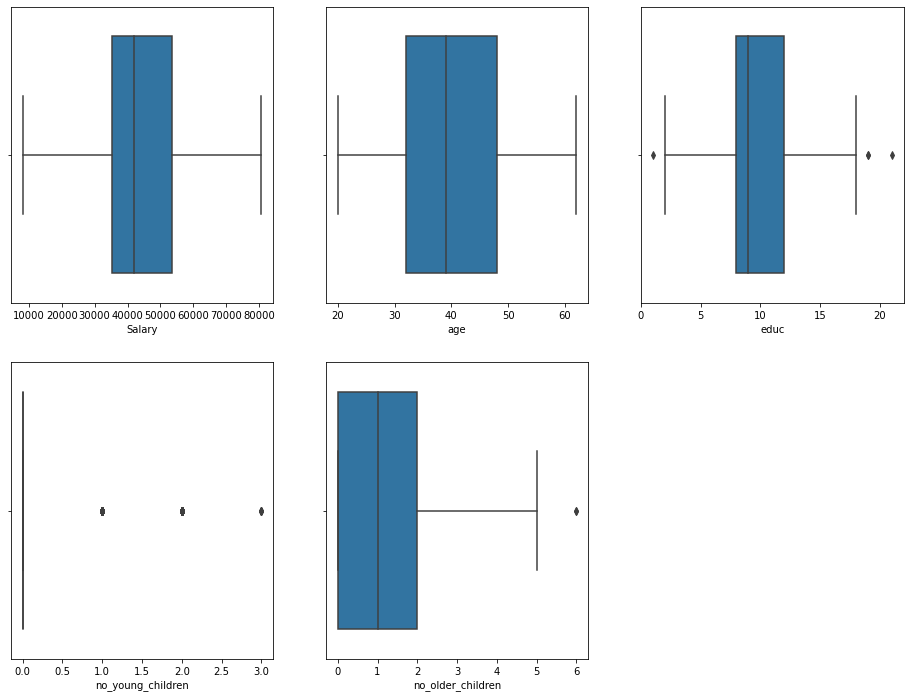

In [79]:
plt.figure(figsize=(16,12))
j=1
for i in ['Salary','age','educ','no_young_children','no_older_children']:
    plt.subplot(2,3,j)
    sns.boxplot(df[i])
    j=j+1

In [80]:
df["Holliday_Package"] = df["Holliday_Package"].astype('category')
df["foreign"] = df["foreign"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Holliday_Package   872 non-null    category
 1   Salary             872 non-null    float64 
 2   age                872 non-null    int64   
 3   educ               872 non-null    int64   
 4   no_young_children  872 non-null    int64   
 5   no_older_children  872 non-null    int64   
 6   foreign            872 non-null    category
dtypes: category(2), float64(1), int64(4)
memory usage: 36.1 KB


In [81]:
df["Holliday_Package"] = df["Holliday_Package"].cat.codes
df["foreign"] = df["foreign"].cat.codes

df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


Train/ Test split

In [82]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)


Logistic Regression

In [84]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [85]:
model = LogisticRegression(max_iter=100000,n_jobs=2)


In [86]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')


In [87]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [88]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [89]:
best_model = grid_search.best_estimator_


In [90]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [91]:
ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [92]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.670787,0.329213
1,0.562189,0.437811
2,0.684365,0.315635
3,0.510178,0.489822
4,0.559970,0.440030


LDA MODEL

In [93]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [94]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [95]:
pred_class_test

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [96]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [97]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.6622950819672131

### Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

Logistic Regression Performance

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



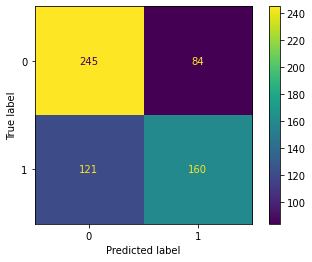

In [98]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262
 



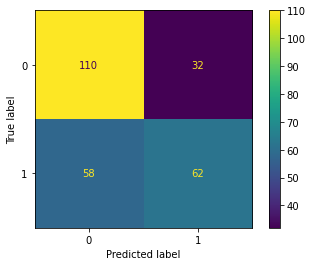

In [99]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [100]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6639344262295082

AUC: 0.733


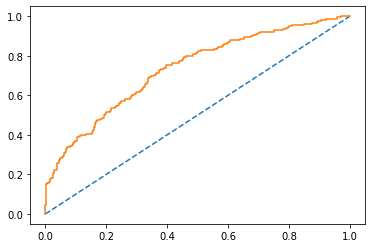

In [101]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [102]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6564885496183206

AUC: 0.716


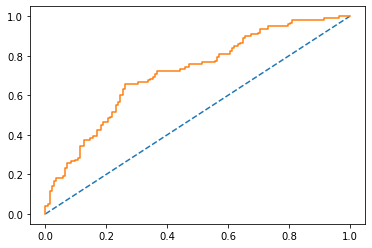

In [103]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [104]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.57
lr_train_f1  0.61


In [105]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.66
lr_test_recall  0.52
lr_test_f1  0.58


LDA MODEL Performance

In [106]:
print(classification_report(y_train, pred_class_train))


              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [107]:
confusion_matrix(y_train, pred_class_train)


array([[243,  86],
       [120, 161]], dtype=int64)

In [108]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.648854961832061

In [109]:
print(classification_report(y_test, pred_class_test))


              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [110]:
confusion_matrix(y_test, pred_class_test)


array([[108,  34],
       [ 58,  62]], dtype=int64)

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


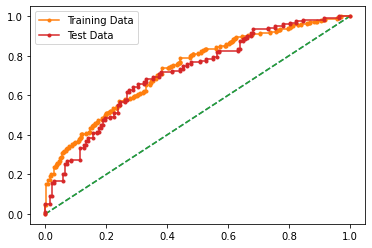

In [111]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [112]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.57
lda_train_f1  0.61


In [113]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.65
lda_test_recall  0.52
lda_test_f1  0.57


In [114]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66,0.66,0.66,0.65
AUC,0.73,0.72,0.73,0.71
Recall,0.57,0.52,0.57,0.52
Precision,0.66,0.66,0.65,0.65
F1 Score,0.61,0.58,0.61,0.57


### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.